## Import Libraries

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read in Data File

In [2]:
#read in data from local machine
df = pd.read_csv('/Users/opeyemi/Downloads/Twitter Takehome/analytical_take_home_data_v2_.csv')
df.head()

,treatment,company_size,campaign_spend,campaign_budget
0,False,small,10.4477,3.9035
1,False,medium,3.7776,1.9872
2,False,medium,46.1880,55.4523
3,False,small,6.6271,6.5136
4,False,small,92.3405,83.1018


## Exploratory Data Analysis
I will start with some Exploratory Data analysis

In [3]:
df.describe()

,campaign_spend,campaign_budget
count,1.547400e+04,1.547400e+04
mean,4.903037e+03,5.772614e+03
std,6.516692e+04,9.903381e+04
min,3.595000e-01,9.190000e-02
25%,1.517812e+01,1.279290e+01
50%,5.009005e+01,4.881625e+01
75%,2.365468e+02,2.523155e+02
max,5.289217e+06,1.024289e+07


In [4]:
#check the info of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 4 columns):
treatment          15474 non-null bool
company_size       15474 non-null object
campaign_spend     15474 non-null float64
campaign_budget    15474 non-null float64
dtypes: bool(1), float64(2), object(1)
memory usage: 377.9+ KB


In [5]:
#check if there are null values
df.isnull().sum()

treatment          0
company_size       0
campaign_spend     0
campaign_budget    0
dtype: int64

We notice no missing values from the information of our dataframe

In [6]:
#check if the treatment is of a balance class
df['treatment'].value_counts()

True     7741
False    7733
Name: treatment, dtype: int64

We have 8 more True cases than the False case.

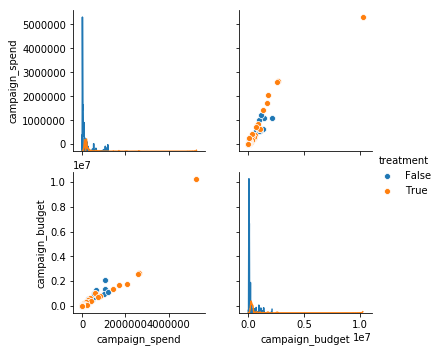

In [7]:
sns.pairplot(vars=["campaign_spend","campaign_budget"], data=df, hue="treatment")

From this plot we can see the presence of some outliers. We cannot conclude on a linear relationship between campaign spend amount and campaign budget. I will go ahead and visualize a blot plot to see descriptive statistics of both variables separated by treatment.

Text(0.5, 1.0, 'Campaign Spend by Company Size, Separated by Treatment')

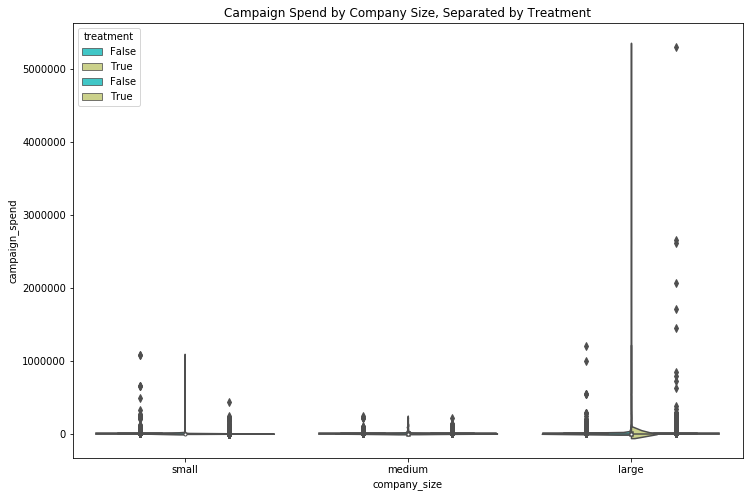

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(x='company_size',y='campaign_spend',hue='treatment',data=df, palette='rainbow')
#sns.swarmplot(x='company_size',y='campaign_spend',hue='treatment', dodge=True,data=df, alpha=.8,color='grey',s=4)
sns.violinplot(x='company_size',y="campaign_spend", data=df, hue='treatment', split='True', palette='rainbow')
plt.title("Campaign Spend by Company Size, Separated by Treatment")

Text(0.5, 1.0, 'Campaign Spend by Company Size, Separated by Treatment')

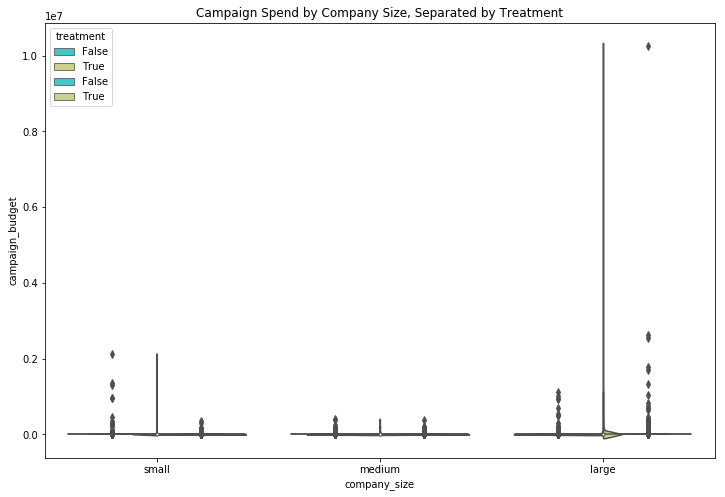

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(x='company_size',y='campaign_budget',hue='treatment',data=df, palette='rainbow')
#sns.swarmplot(x='company_size',y='campaign_budget',hue='treatment', dodge=True,data=df, alpha=.8,color='grey',s=4)
sns.violinplot(x='company_size',y="campaign_budget", data=df, hue='treatment', split='True', palette='rainbow')
plt.title("Campaign Spend by Company Size, Separated by Treatment")

We notice that the medium sized companies have the same median for both the budget and the spending in both treatment and control. The inter quartile range is smaller in the treatment group compared to the control group.


## Question 1
How many campaigns have overspend of greater than 1% of their budget in the control group? In the treatment group?

In [10]:
# calculate the overspend percentage
df['overspend_pct'] = (df['campaign_spend'] - df['campaign_budget']) / (df['campaign_budget'])*100
df.head()


,treatment,company_size,campaign_spend,campaign_budget,overspend_pct
0,False,small,10.4477,3.9035,167.649545
1,False,medium,3.7776,1.9872,90.096618
2,False,medium,46.1880,55.4523,-16.706791
3,False,small,6.6271,6.5136,1.742508
4,False,small,92.3405,83.1018,11.117328


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 5 columns):
treatment          15474 non-null bool
company_size       15474 non-null object
campaign_spend     15474 non-null float64
campaign_budget    15474 non-null float64
overspend_pct      15474 non-null float64
dtypes: bool(1), float64(3), object(1)
memory usage: 498.8+ KB


In [12]:
df.loc[(df['treatment'] == True) & (df['overspend_pct'] > 1.0), 'overspend_gt1pct'] = 'Treatment'  
df.loc[(df['treatment'] == False) & (df['overspend_pct'] > 1.0), 'overspend_gt1pct'] = 'Control'  

df.head()

,treatment,company_size,campaign_spend,campaign_budget,overspend_pct,overspend_gt1pct
0,False,small,10.4477,3.9035,167.649545,Control
1,False,medium,3.7776,1.9872,90.096618,Control
2,False,medium,46.1880,55.4523,-16.706791,NaN
3,False,small,6.6271,6.5136,1.742508,Control
4,False,small,92.3405,83.1018,11.117328,Control


In [13]:
df['overspend_gt1pct'].value_counts()

Control      5716
Treatment    5180
Name: overspend_gt1pct, dtype: int64

## Question 2

Was the new product effective at reducing overspend, and was it more or less effective
depending on the company size? Put together an analysis describing how the treatment
affected overspend.

### Question 2a
Was the new product effective at reducing overspend?

#### Assumption

* Before checking if the new product is effective at reducing overspend.
    * I will assume the treatment and control groups are statistically independent so both can be treated as unpaired.
    * obersvation in treatment & control group have an approximately normal distribution 
    * Homogeneity of variances (variances are equal between treatment and control group)
    * Treatment & control group are sampled independently from each other from the same population

* I will check if there is a signficant association between treatment and company size to overspend using chi-square independence test 
  

##### Statistical Significant Test

###### Null Hypotesis: There is no relationship between treatment and company_size
###### Alternative Hypothesis: There is relationship between treatment and company_size

In [14]:

contingency_table=pd.crosstab(df["treatment"],df["company_size"])
print('contingency_table :-\n',contingency_table)#Observed Values
print()
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
print()
from scipy import stats
chi=stats.chi2_contingency(contingency_table)
Expected_Values = chi[3]
print("Expected Values :-\n",Expected_Values)
print()
r=len(contingency_table.iloc[0:2,0])
c=len(contingency_table.iloc[0,0:2])
ddof=(r-1)*(c-1)
print("Degree of Freedom:-",ddof)
print()
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
print()
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)#p-value
print()
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print()
print('Significance level: ',alpha)
print()
print('Degree of Freedom: ',ddof)
print()
print('chi-square statistic:',chi_square_statistic)
print()
print('critical_value:',critical_value)
print()
print('p-value:',p_value)
print()
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between treatment and company_size")
    print()
else:
    print("Accept H0,There is no relationship between treatment and company_size")
    print()
if p_value<=alpha:
    print("Reject H0,There is a relationship between treatment and company_size")
    print()
else:
    print("Accept H0,There is no relationship between treatment and company_size")

contingency_table :-
 company_size  large  medium  small
treatment                         
False          2701     735   4297
True           2445     692   4604

Observed Values :-
 [[2701  735 4297]
 [2445  692 4604]]

Expected Values :-
 [[2571.66976864  713.13112317 4448.19910818]
 [2574.33023136  713.86887683 4452.80089182]]

Degree of Freedom:- 1

chi-square statistic:- 14.341978165326047

critical_value: 3.841458820694124

p-value: 0.00015242777251955886

Significance level:  0.05

Degree of Freedom:  1

chi-square statistic: 14.341978165326047

critical_value: 3.841458820694124

p-value: 0.00015242777251955886

Reject H0,There is a relationship between treatment and company_size

Reject H0,There is a relationship between treatment and company_size



We can conclude that treatment and company size are very significant to overspend, from the small p-value's, which are less than 0.005. 

To check if the new product is effective at reducing overspend, I will use the t distribution to compare the result of the two experiements. Since the assumptions of t-distribution are assuming normal dstribution & homogenuity variance, i will start by checking if the two groups are normally distributed before performing a t distribution experiemnt.


##### Normality Test

###### Null Hypotesis: The two groups are normally distributed
###### Alternative Hypothesis: The two groups are not normally distributed

In [15]:
import warnings
warnings.filterwarnings("ignore")

df["treatment_norm"]=np.nan
df["control_norm"]=np.nan
df["treatment_norm"][df["treatment"]==True]=df["overspend_pct"]
df["control_norm"][df["treatment"]==False]=df["overspend_pct"]
df.head()

,treatment,company_size,campaign_spend,campaign_budget,overspend_pct,overspend_gt1pct,treatment_norm,control_norm
0,False,small,10.4477,3.9035,167.649545,Control,NaN,167.649545
1,False,medium,3.7776,1.9872,90.096618,Control,NaN,90.096618
2,False,medium,46.1880,55.4523,-16.706791,NaN,NaN,-16.706791
3,False,small,6.6271,6.5136,1.742508,Control,NaN,1.742508
4,False,small,92.3405,83.1018,11.117328,Control,NaN,11.117328


In [16]:
from scipy import stats
k2, p_control = stats.normaltest(df["control_norm"], nan_policy='omit')
alpha = 1e-3
print("p_control = {:g}".format(p_control))
if p_control < alpha:  # Null Hypotesis: control group is normally distributed
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    

k2, p_treatment = stats.normaltest(df["control_norm"], nan_policy='omit')
alpha = 1e-3
print("p_treatment = {:g}".format(p_treatment))
if p_treatment < alpha:  # Null Hypotesis: treatment group is normally distributed
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p_control = 0
The null hypothesis can be rejected
p_treatment = 0
The null hypothesis can be rejected


* From the result above it's obvious that overspend is not normally distributed. 

* I will next try to improve the normality of the overspend variable, by using the transformation method that reduces the skewness of the overspend. 

* I will be using both log transformation and inverse transformation, then I will choose the method that gives the least skewness. To avoid having NaN values due to negatives values in the log tranformation method, I will add the least negative value, that's add 58.

In [17]:
df.describe()

,campaign_spend,campaign_budget,overspend_pct,treatment_norm,control_norm
count,1.547400e+04,1.547400e+04,15474.000000,7741.000000,7733.000000
mean,4.903037e+03,5.772614e+03,21.462456,17.606350,25.322550
std,6.516692e+04,9.903381e+04,71.981600,69.834845,73.871456
min,3.595000e-01,9.190000e-02,-57.485809,-57.485809,-49.987882
25%,1.517812e+01,1.279290e+01,0.308085,-5.320827,0.840123
50%,5.009005e+01,4.881625e+01,5.619451,4.626489,6.455069
75%,2.365468e+02,2.523155e+02,24.010133,20.876299,27.588553
max,5.289217e+06,1.024289e+07,400.081466,400.081466,400.030741


In [18]:
## Log transformation generates NaN due to presence of negatives, the smallest number is -57.48581 so 58 is added to make all values positive
df['overspend_pct_log'] = np.log10(df['overspend_pct']+58)
## Inverse transformation
df['overspend_pct_inv'] = 1/(df['overspend_pct'])

In [19]:
skew_log = df['overspend_pct_log'].skew()
skew_inv = df['overspend_pct_inv'].skew()
skew_log, skew_inv

(-0.34078984974856374, nan)

* I will be choosing the log transformation method, even though the negative value means skewed to the left with a long tail.

###### Homogeneity of Variance

###### Null Hypothesis: Treatment and Control group have equal variance
###### Alternative Hypothesis: Treatment and Control group have different variance

In [20]:
import warnings
warnings.filterwarnings("ignore")

df["treatment_var"]=np.nan
df["control_var"]=np.nan
df["treatment_var"][df["treatment"]==True]=df["overspend_pct_log"]
df["control_var"][df["treatment"]==False]=df["overspend_pct_log"]
df.head()

,treatment,company_size,campaign_spend,campaign_budget,overspend_pct,overspend_gt1pct,treatment_norm,control_norm,overspend_pct_log,overspend_pct_inv,treatment_var,control_var
0,False,small,10.4477,3.9035,167.649545,Control,NaN,167.649545,2.353434,0.005965,NaN,2.353434
1,False,medium,3.7776,1.9872,90.096618,Control,NaN,90.096618,2.170545,0.011099,NaN,2.170545
2,False,medium,46.1880,55.4523,-16.706791,NaN,NaN,-16.706791,1.615879,-0.059856,NaN,1.615879
3,False,small,6.6271,6.5136,1.742508,Control,NaN,1.742508,1.776283,0.573885,NaN,1.776283
4,False,small,92.3405,83.1018,11.117328,Control,NaN,11.117328,1.839587,0.089950,NaN,1.839587


In [21]:
from scipy.stats import bartlett

# Bartlett's test in Python with SciPy:
stat, p = bartlett(df['control_var'],df['treatment_var'])
# Get the results:
print(stat, p)

40.61950521106939 1.8495120383608748e-10


p-value is less than confidence interval 0.05, which means we reject the null hypothesis that there is no difference in the groups variance. But we want homogeneity of the variance, so I will go ahead and plot the overspent percentage and the company size, separated by the treatment to see if we can use the unequal variance.

Text(0.5, 1.0, 'overspend_pct_log by Company Size, Separated by Treatment')

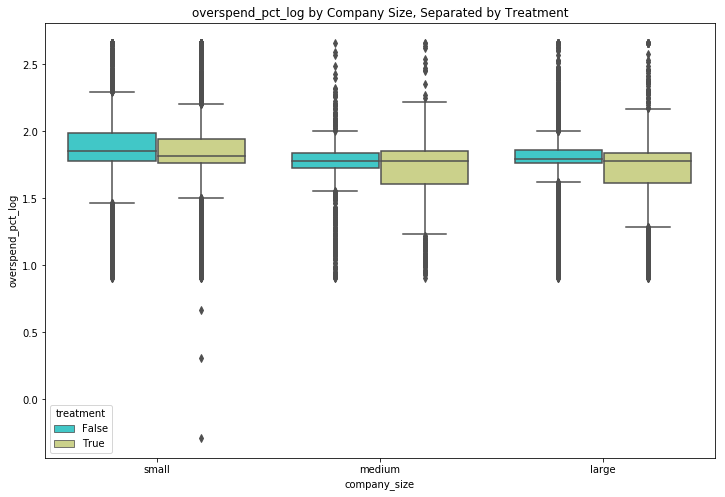

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(x='company_size',y='overspend_pct_log',hue='treatment',data=df, palette='rainbow')
#sns.swarmplot(x='company_size',y='campaign_spend',hue='treatment', dodge=True,data=df, alpha=.8,color='grey',s=4)
#sns.violinplot(x='company_size',y="overspend_pct_log", data=df, split='True', palette='rainbow')
plt.title("overspend_pct_log by Company Size, Separated by Treatment")

From the box-plot, we notice that the median of both the control and treatment group is about the same for the medium sized companies. 

The treatment group also turn out to have a slightly lower overspend for the small and large sized companies as compared to the control group. The medium sized companies have roughly the same median budget and spending in both the treatment and control. 

The Inter-Quartile Range (IQR) of the medium and large sized companies is larger in the treatment group compared to the control group. In the small sized companies, the IQR is smaller in the treatment group compared to the control group. 

I will conclud from the boxplot that considering unequal variances would be good, then we can use the unequal variance test and proceed to perform a t-test. 


###### T-Test

In [23]:
cat = ['treatment', 'company_size', 'overspend_pct_log']
df1 = df[cat]

In [25]:
from scipy import stats as st

# t test using scipy
a = df1.loc[df1['treatment'] == True, 'overspend_pct_log']
b = df1.loc[df1['treatment'] == False, 'overspend_pct_log']
st.ttest_ind(a=a, b=b, equal_var=False)



Ttest_indResult(statistic=-10.201128884686826, pvalue=2.3415858650106703e-24)

At a 95% confidence, having a p-value below 0.05 suggests that control group had more overspend than the treatment group. Therefore I can conclude that the new product was effective at reducing overspend.
